# PROJET ACADEMIQUE D' APPRENTISSAGE ( MACHINE LEARNING)

## I-) Introduction
Ce projet consiste à faire une prediction sur un ensemble des données fournissant des informations sur les articles publiés par
Mashable sur une periode de deux ans. Par la suite, on fera une sélection et influence sur les variables. 
Le jeu des données présente plusieurs attribus notamment 61 variables dont 58 sont prédictives, deuxnon prédictives et une variable de but. 
Toutes les informations sur ce jeu des données seront présentées dans la suite de l'étude.

## II-) Importation de quelques librairies nécessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import zscore 


## III-) Importation, Manipulation et description du jeu des données

In [2]:
import os

os.getcwd()
path=r"D:/Bureau/Apprentissage_Bis"

os.chdir(path)
os.getcwd()

df=pd.read_csv("OnlineNewsPopularity1.csv", sep=",", decimal=".")
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

Les variables non prédictives sont: 'URL' de l'article , timedelta qui represente les Jours entre la publication de l'article et l'acquisition du jeu de données et la variable cible est 'shares'.

In [4]:
#Nettoyage du jeu des données pour eliminer l'espace après le premier guillement
df.columns = df.columns.str.strip()
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [5]:
# Ces variables sont discrètes donc on va les coder en int64 pour différencier dans les visualisations
_int_features = ['n_tokens_title','n_tokens_content','num_hrefs','num_self_hrefs','num_imgs','num_videos','num_keywords']
for f in _int_features:
    df[f] = df[f].astype('int64')
df['n_tokens_title']

0        12
1         9
2         9
3         9
4        13
         ..
39639    11
39640    12
39641    10
39642     6
39643    10
Name: n_tokens_title, Length: 39644, dtype: int64

In [6]:
# Ces variables sont binaires donc on va les coder en booléennes pour différencier dans les visualisations
_binary_features = ['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed',
                    'data_channel_is_tech','data_channel_is_world','weekday_is_monday','weekday_is_tuesday',
                    'weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday','is_weekend']
for f in _binary_features:
    df[f] = df[f].astype('bool')
df['data_channel_is_entertainment']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  int64  
 3   n_tokens_content               39644 non-null  int64  
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  int64  
 8   num_self_hrefs                 39644 non-null  int64  
 9   num_imgs                       39644 non-null  int64  
 10  num_videos                     39644 non-null  int64  
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

In [7]:
# On va éliminer les deux variables non prédictives
df = df.drop(columns=['url', 'timedelta'])

In [8]:
# Vérifier s'il ya des valeurs manquantes et des doublons
df.isnull().sum().sort_values(ascending=False)
print(df.duplicated().sum())

0


In [9]:
# Quelques statistiques descriptives simples
df.describe()
#df.shape

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


Statistiques descriptives de 'shares':
count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64


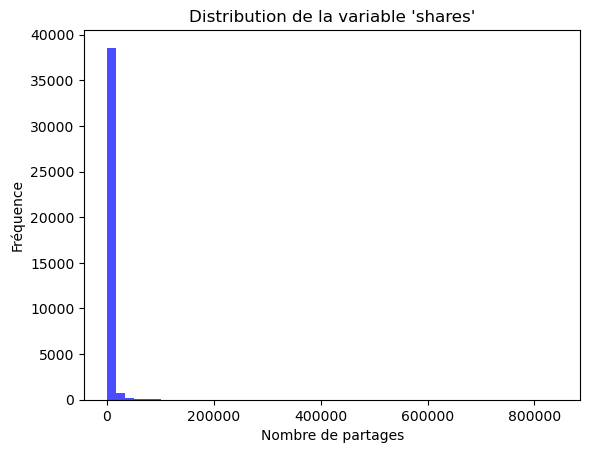

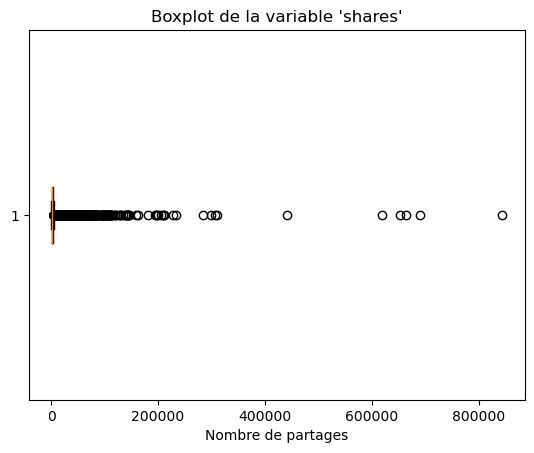

In [10]:
# Statistiques descriptives de la variable cible
print("Statistiques descriptives de 'shares':")
print(df['shares'].describe())

#Visualisation de la distribution de 'shares'

plt.hist(df['shares'], bins=50, alpha=0.7, color='blue')
plt.title("Distribution de la variable 'shares'")
plt.xlabel("Nombre de partages")
plt.ylabel("Fréquence")
plt.show()

# Boxplot
plt.boxplot(df['shares'], vert=False)
plt.title("Boxplot de la variable 'shares'")
plt.xlabel("Nombre de partages")
plt.show()



* Commentaire: En regardant les statistiques descriptives on remarque qu'il ya une très grande différence entre le min et le max, l'ecart-type et la moyenne (il est strictement plus grand que la moyenne), on en déduit qu'il ya une forte dispersion autour de la moyenne, et cela pourrait indiquer la présence des valeurs extrêmes (outliers). De plus, la médiane qui est de 1400 est bien inférieure à la moyenne, ce qui indique une distribution asymétrique positive (à remarquer sur le graphe de distribution).
Le boxplot montre une grande quantité de points dispersés loin de la boîte principale, indiquant la présence de nombreux outliers (valeurs extrêmes). Ces valeurs sont les articles ayant un nombre de partages exceptionnellement élevé.  La boîte principale est très compacte, ce qui confirme que la majorité des valeurs se situe dans un intervalle restreint. Les valeurs situées à l'extérieur sont considérées comme des outliers et représentent les articles les plus populaires.

Moyenne de 'shares' pour 'data_channel_is_lifestyle':
data_channel_is_lifestyle
False    3379.349447
True     3682.123392
Name: shares, dtype: float64



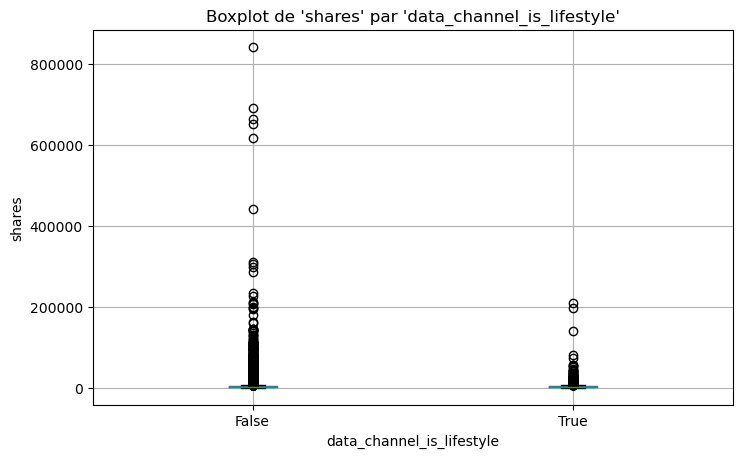

Moyenne de 'shares' pour 'data_channel_is_entertainment':
data_channel_is_entertainment
False    3487.394513
True     2970.487034
Name: shares, dtype: float64



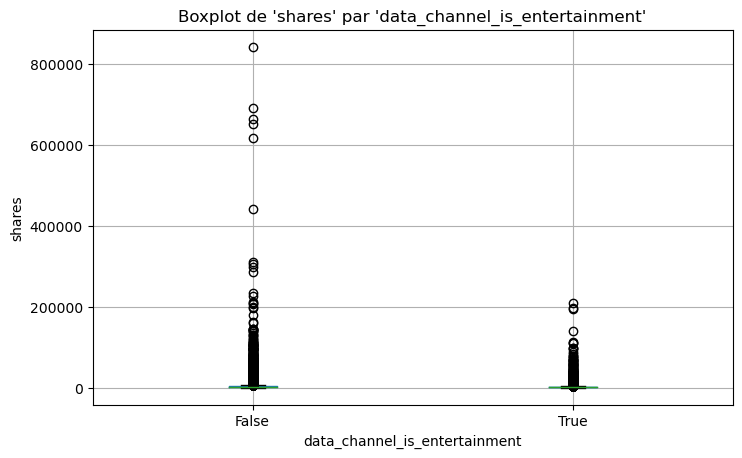

Moyenne de 'shares' pour 'data_channel_is_bus':
data_channel_is_bus
False    3457.679327
True     3063.018536
Name: shares, dtype: float64



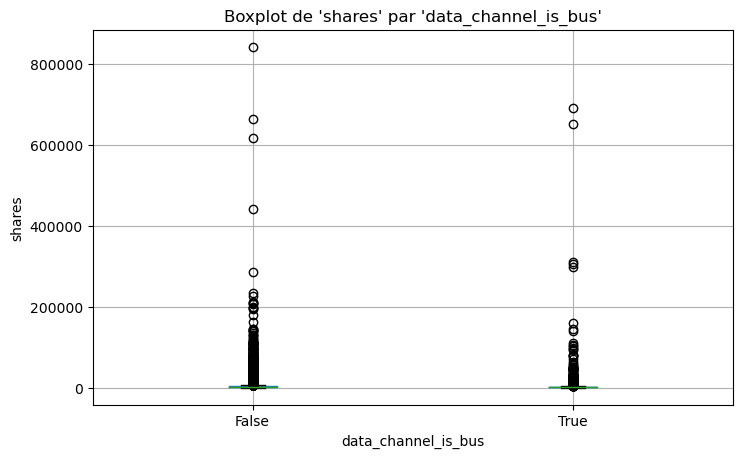

Moyenne de 'shares' pour 'data_channel_is_socmed':
data_channel_is_socmed
False    3380.814957
True     3629.383125
Name: shares, dtype: float64



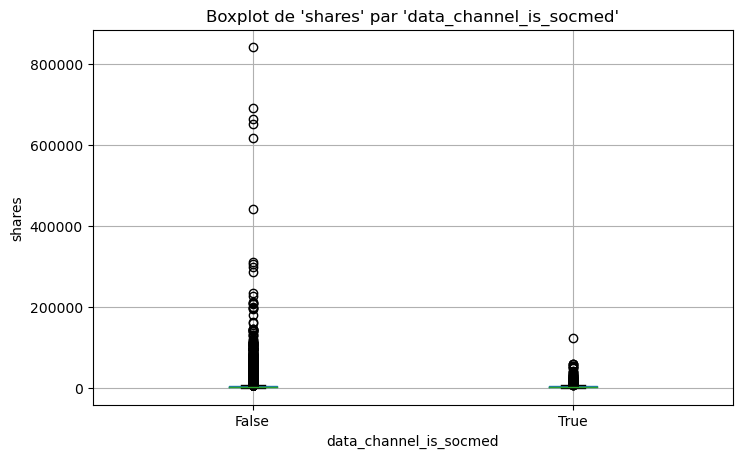

Moyenne de 'shares' pour 'data_channel_is_tech':
data_channel_is_tech
False    3468.866772
True     3072.283283
Name: shares, dtype: float64



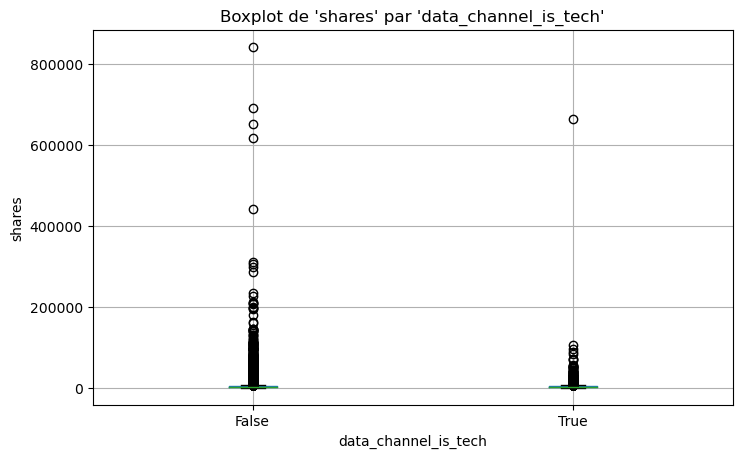

Moyenne de 'shares' pour 'data_channel_is_world':
data_channel_is_world
False    3694.388218
True     2287.734069
Name: shares, dtype: float64



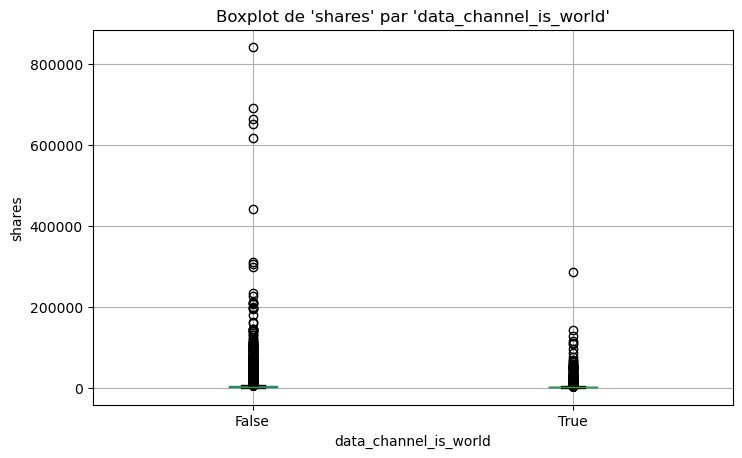

Moyenne de 'shares' pour 'weekday_is_monday':
weekday_is_monday
False    3344.559713
True     3647.025822
Name: shares, dtype: float64



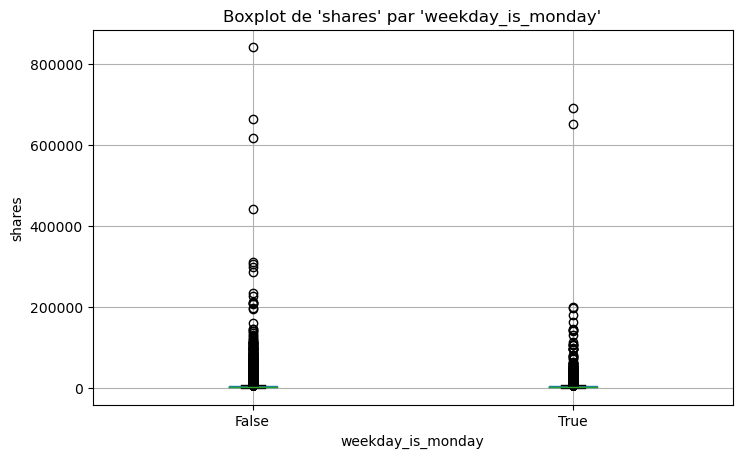

Moyenne de 'shares' pour 'weekday_is_tuesday':
weekday_is_tuesday
False    3439.572518
True     3202.500677
Name: shares, dtype: float64



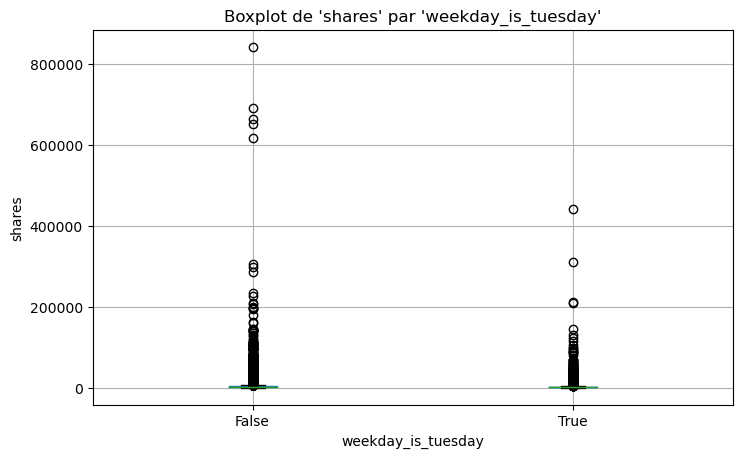

Moyenne de 'shares' pour 'weekday_is_wednesday':
weekday_is_wednesday
False    3416.611289
True     3303.405380
Name: shares, dtype: float64



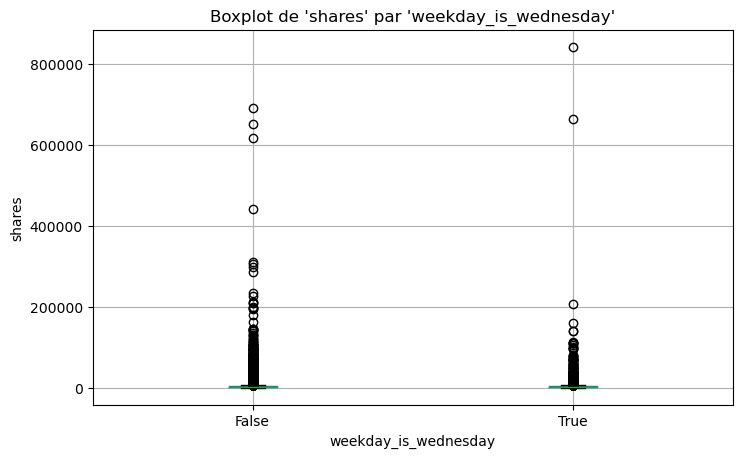

Moyenne de 'shares' pour 'weekday_is_thursday':
weekday_is_thursday
False    3444.036569
True     3178.599147
Name: shares, dtype: float64



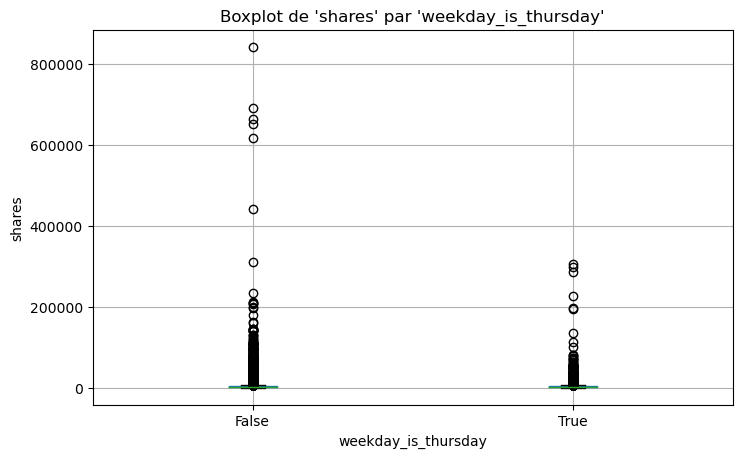

Moyenne de 'shares' pour 'weekday_is_friday':
weekday_is_friday
False    3413.889020
True     3285.181021
Name: shares, dtype: float64



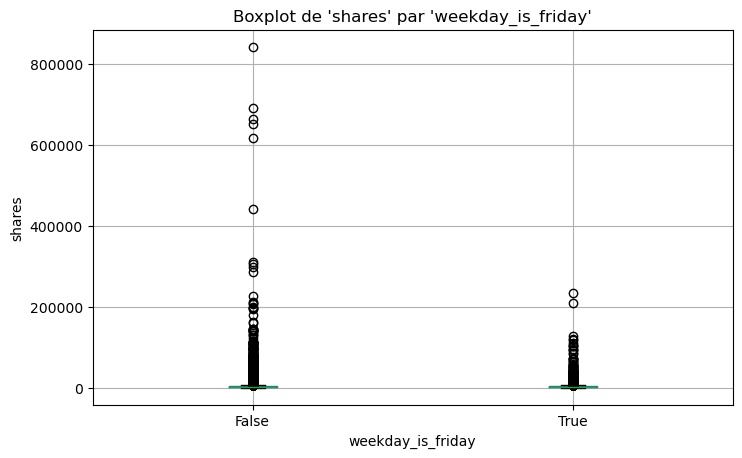

Moyenne de 'shares' pour 'weekday_is_saturday':
weekday_is_saturday
False    3350.344546
True     4078.185079
Name: shares, dtype: float64



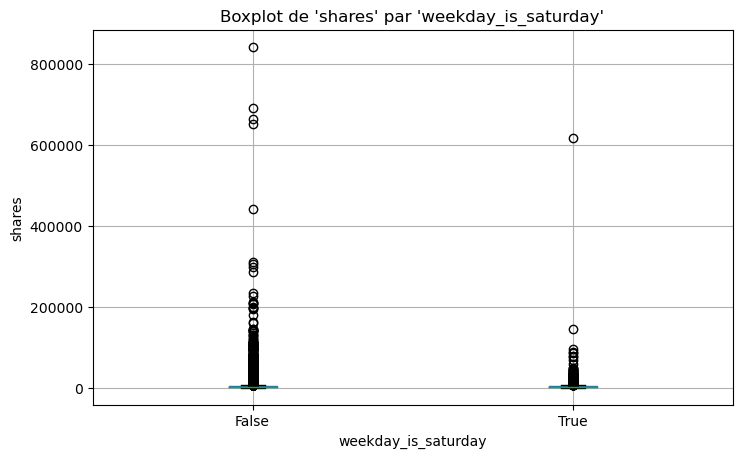

Moyenne de 'shares' pour 'weekday_is_sunday':
weekday_is_sunday
False    3369.323516
True     3746.740592
Name: shares, dtype: float64



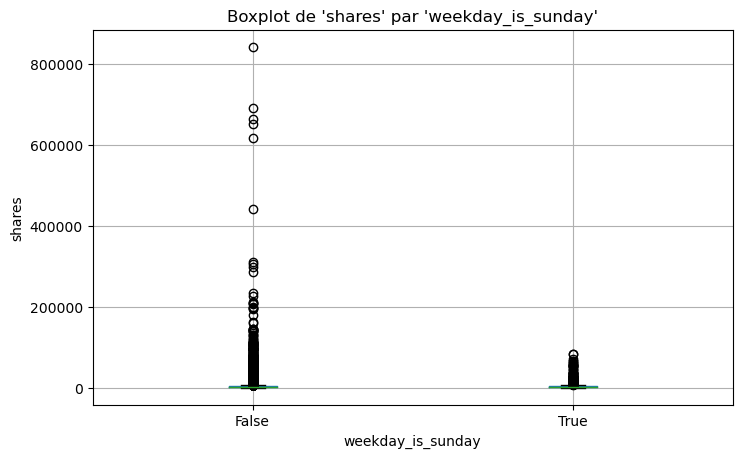

Moyenne de 'shares' pour 'is_weekend':
is_weekend
False    3318.855140
True     3903.394412
Name: shares, dtype: float64



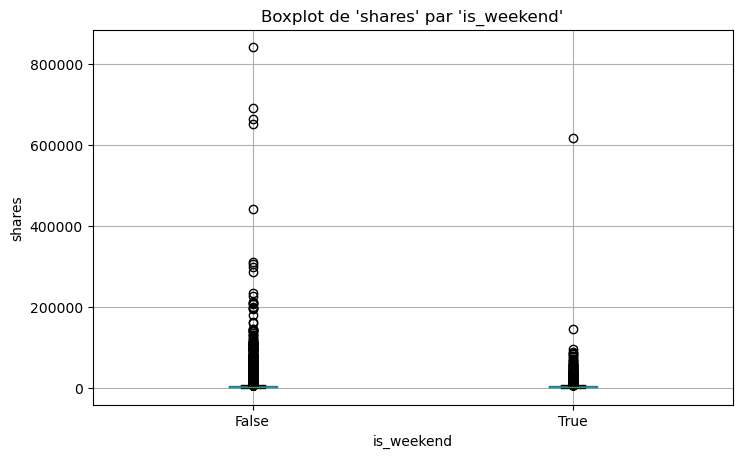

Moyenne de 'shares' pour 'data_channel_is_lifestyle':
data_channel_is_lifestyle
False    3379.349447
True     3682.123392
Name: shares, dtype: float64



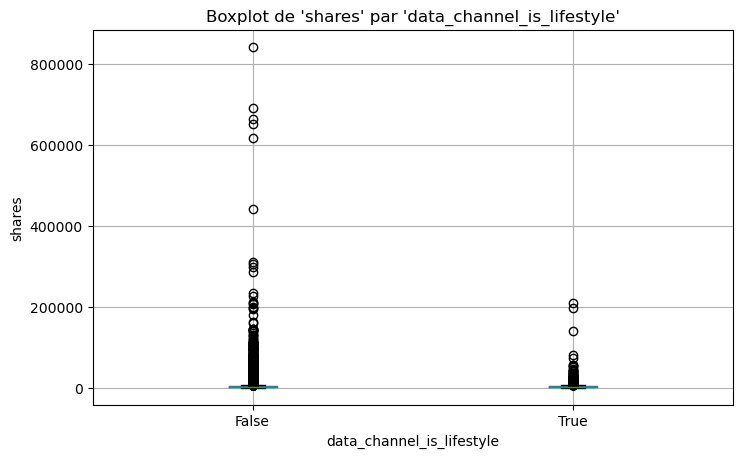

In [11]:
# Analyser la relation entre la variable cible et chaque variable binaire
variables_bool = df.select_dtypes(include='bool').columns
for col in variables_bool:
    # Calcul de la moyenne de 'shares' pour chaque valeur de la variable binaire
    moyenne_par_groupe = df.groupby(col)['shares'].mean()
    print(f"Moyenne de 'shares' pour '{col}':\n{moyenne_par_groupe}\n")

    # Visualisation avec un boxplot
    df.boxplot(column='shares', by=col, figsize=(8, 5))
    plt.title(f"Boxplot de 'shares' par '{col}'")
    plt.suptitle("")  # Supprimer le titre automatique
    plt.xlabel(col)
    plt.ylabel('shares')
    plt.show()

# Calculer la moyenne de 'shares' par groupe
moyenne_par_groupe = df.groupby('data_channel_is_lifestyle')['shares'].mean()
print(f"Moyenne de 'shares' pour 'data_channel_is_lifestyle':\n{moyenne_par_groupe}\n")

# Visualisation avec un boxplot
df.boxplot(column='shares', by='data_channel_is_lifestyle', figsize=(8, 5))

# Personnalisation du graphique
plt.title("Boxplot de 'shares' par 'data_channel_is_lifestyle'")
plt.suptitle("")  # Supprimer le titre automatique généré par pandas
plt.xlabel('data_channel_is_lifestyle')
plt.ylabel('shares')

# Affichage du graphique
plt.show()


Corrélation entre 'shares' et 'n_tokens_title': 0.01


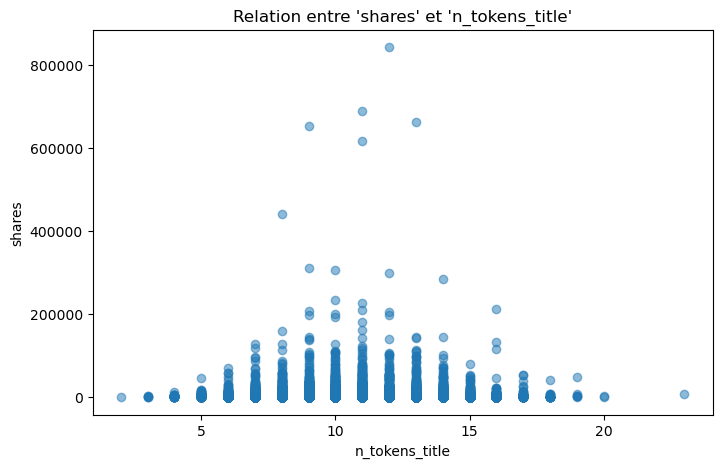

In [12]:
# Liste des variables discrètes (type entier)
#variables_discretes = [
    #'n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_self_hrefs',
    #'num_imgs', 'num_videos', 'num_keywords'
#]

# Analyser la relation entre la variable cible et chaque variable discrète
#for col in variables_discretes:
    #correlation = df['shares'].corr(df[col])
    #print(f"Corrélation entre 'shares' et '{col}': {correlation:.2f}")

    # Visualisation avec un scatterplot
    #plt.figure(figsize=(8, 5))
    #plt.scatter(df[col], df['shares'], alpha=0.5)
    #plt.title(f"Relation entre 'shares' et '{col}'")
    #plt.xlabel(col)
    #plt.ylabel('shares')
    #plt.show()

# Calcul de la corrélation
correlation = df['shares'].corr(df['n_tokens_title'])
print(f"Corrélation entre 'shares' et 'n_tokens_title': {correlation:.2f}")

# Visualisation avec un scatterplot
plt.figure(figsize=(8, 5))
plt.scatter(df['n_tokens_title'], df['shares'], alpha=0.5)
plt.title("Relation entre 'shares' et 'n_tokens_title'")
plt.xlabel('n_tokens_title')
plt.ylabel('shares')
plt.show()

Corrélation entre 'shares' et 'abs_title_sentiment_polarity': 0.03


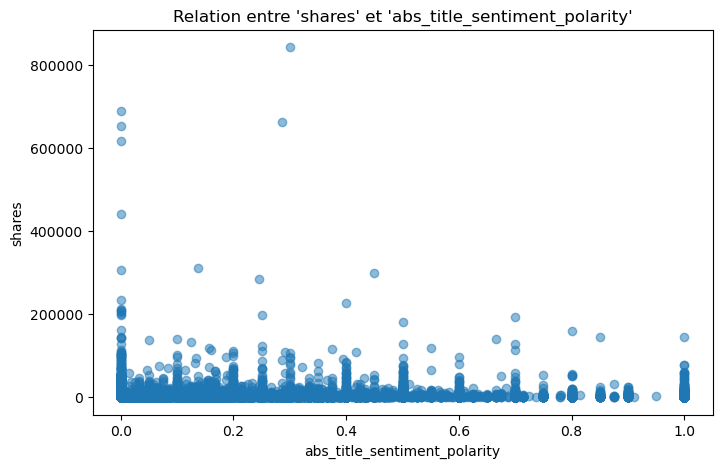

In [13]:
# Liste des variables continues (type float)
#variables_continues = df.select_dtypes(include='float').columns

# Analyser la relation entre la variable cible et chaque variable continue
#for col in variables_continues:
    #correlation = df['shares'].corr(df[col])
    #print(f"Corrélation entre 'shares' et '{col}': {correlation:.2f}")

    # Visualisation avec un scatterplot
    #plt.figure(figsize=(8, 5))
    #plt.scatter(df[col], df['shares'], alpha=0.5)
    #plt.title(f"Relation entre 'shares' et '{col}'")
    #plt.xlabel(col)
    #plt.ylabel('shares')
    #plt.show()

# Liste des variables continues (type float)
#variables_continues = df.select_dtypes(include='float').columns

# Analyser la relation entre la variable cible et chaque variable continue
#for col in variables_continues:
# Calcul de la corrélation
correlation = df['shares'].corr(df['abs_title_sentiment_polarity'])
print(f"Corrélation entre 'shares' et 'abs_title_sentiment_polarity': {correlation:.2f}")

# Visualisation avec un scatterplot
plt.figure(figsize=(8, 5))
plt.scatter(df['abs_title_sentiment_polarity'], df['shares'], alpha=0.5)
plt.title("Relation entre 'shares' et 'abs_title_sentiment_polarity'")
plt.xlabel('abs_title_sentiment_polarity')
plt.ylabel('shares')
plt.show()

*Commentaire: A partir des graphiques décrivant le lien entre chaque variable explicative et la cible, on peut observer que la majorité des variables explicatives ont une faible corrélation avec la cible car les coefficients de corrélation sont majoritairement proches de zero. 
On constate également une grande dispersion des valeurs indiquant probablement des dispersions fortement asymétrique, et peuvent nécessiter un traitement spécifique.
Il n'ya donc pas aussi une linéarité entre la cible et les variables explicatives.

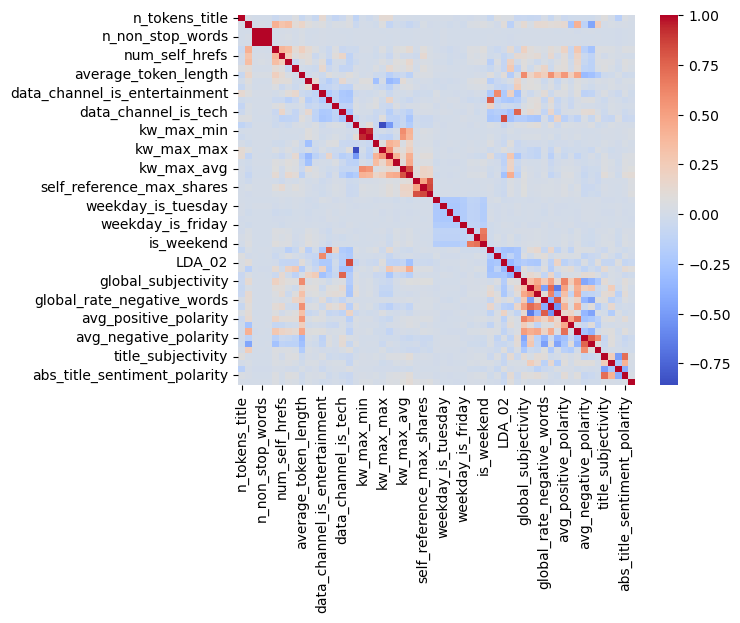

In [14]:
# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Afficher la carte de chaleur (heatmap) pour visualiser la corrélation entre les variables
#plt.figure(figsize=(15, 12))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
#plt.title('Matrice de Corrélation entre les Variables')
#plt.show()

sns.heatmap(df.corr(), cmap="coolwarm")
plt.show()


In [15]:
#boolean_columns = df.select_dtypes(include='bool').columns
#print("Colonnes booléennes :", boolean_columns)
#Convertir les colonnes booléennes en 0 et 1
#df[boolean_columns] = df[boolean_columns].astype(int)
#df.info()

In [16]:
from sklearn.ensemble import IsolationForest

# Supprimer les colonnes non numériques
df_numeric = df.select_dtypes(include=['number'])  # Garder uniquement les colonnes numériques

# Appliquer l'Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_labels = iso_forest.fit_predict(df_numeric)

# Ajouter les labels d'anomalie au DataFrame d'origine
df['outlier'] = outlier_labels

# Afficher les outliers
outliers = df[df['outlier'] == -1]
print("Outliers détectés:")
print(outliers)

# Compter le nombre total d'outliers détectés
total_outliers = len(outliers)
print("Nombre total d'outliers détectés:", total_outliers)

Outliers détectés:
       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
4                  13              1072         0.415646               1.0   
7                  12               989         0.433574               1.0   
12                  9               274         0.609195               1.0   
13                  9               285         0.744186               1.0   
16                  8              1118         0.512397               1.0   
...               ...               ...              ...               ...   
39598              11                 0         0.000000               0.0   
39601              12                 0         0.000000               0.0   
39613              12                 0         0.000000               0.0   
39615              11                 0         0.000000               0.0   
39616              15                 0         0.000000               0.0   

       n_non_stop_unique_tokens  num_hrefs  

In [17]:
df.head(5)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,outlier
0,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,1
1,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,1
2,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1
3,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,1
4,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,-1


In [18]:
df = df.drop(df.columns[-1], axis=1)
df

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11,346,0.529052,1.0,0.684783,9,7,1,1,4.523121,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,12,328,0.696296,1.0,0.885057,9,7,3,48,4.405488,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,10,442,0.516355,1.0,0.644128,24,1,12,1,5.076923,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,6,682,0.539493,1.0,0.692661,10,1,1,0,4.975073,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


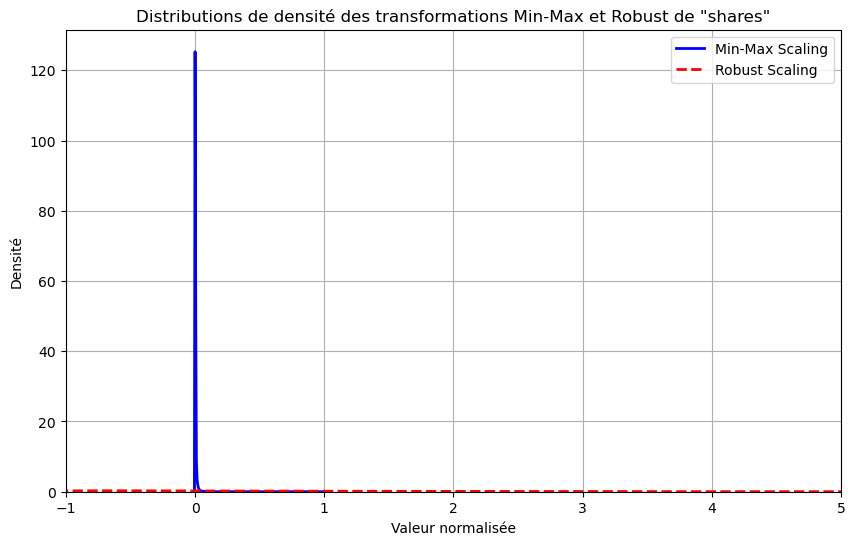

In [19]:
# Création de la figure pour visualiser les distributions
# Normalisation Minmax et robust de la variable cible 
from sklearn.preprocessing import MinMaxScaler, RobustScaler

scaler_minmax = MinMaxScaler()
df['shares_minmax'] = scaler_minmax.fit_transform(df[['shares']])

scaler_robust = RobustScaler()
df['shares_robust'] = scaler_robust.fit_transform(df[['shares']])



plt.figure(figsize=(10, 6))

# Distribution de 'shares_minmax' (Min-Max Scaling)
sns.kdeplot(df['shares_minmax'], label='Min-Max Scaling', linestyle='-', linewidth=2, color='blue')

# Distribution de 'shares_robust' (Robust Scaling)
sns.kdeplot(df['shares_robust'], label='Robust Scaling', linestyle='--', linewidth=2, color='red')

# Ajuster les limites de l'axe des X pour une meilleure visibilité
plt.xlim(-1, 5)  # Ajuster selon les données, si nécessaire

# Configuration du graphique
plt.xlabel('Valeur normalisée')
plt.ylabel('Densité')
plt.title('Distributions de densité des transformations Min-Max et Robust de "shares"')
plt.legend()
plt.grid(True)
plt.show()

*Commentaire: La normalisation Minmax a ramené la variable coble entre 0 et 1 comme attendu (graphique en bleu). Par contre la normalisation robuste n'a pas centré la variable cible comme attendu (graphique en rouge). Par la suite on pourra appliquer la normalisation Minmax sur les variables numériques explicatives pour attenuer l'effet des valeurs extrêmes car certains modèles sont sensibles aux valeurs extrêmes.

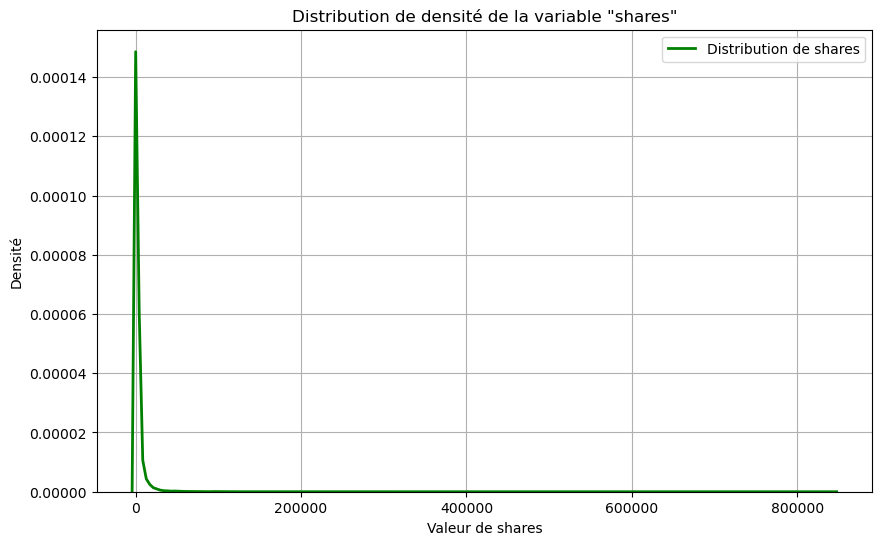

In [20]:
# Distribution de la densité de la variable cible 'shares' avant normalisation
plt.figure(figsize=(10, 6))
sns.kdeplot(df['shares'], label='Distribution de shares', linestyle='-', linewidth=2, color='green')
plt.xlabel('Valeur de shares')
plt.ylabel('Densité')
plt.title('Distribution de densité de la variable "shares"')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,shares_minmax,shares_robust
0,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,...,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0.000702,-0.435275
1,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,...,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0.000842,-0.371629
2,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,...,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,0.001778,0.053937
3,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,...,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0.001422,-0.107875
4,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,...,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0.000598,-0.482740


In [22]:
# On retire les variables shares_minmax et shares_robust issues de la normalisation de la variable 'shares'
df = df.drop(df.columns[-2:], axis=1)
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [23]:
# Renommer la variable cible 'shares' par popularity 
popularity=df[df.keys()[-1]]
popularity.describe()


count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

### III-1) Discrétisation de la variable cible à base de la valeur médiane
Le présent jeu des données présente des attribus hétérogènes sur la popularité d'articles. Les visualisations du lien entre les variables explicatives et la variable cible obtenues plus haut nous indique clairement des rélations très complexes. Au regard de ces résultats et vue le problème de prédiction qui nous intéresse (prédiction sur la popularité d'articles), nous allons choisir de faire une classification basée sur la médiane car la médiane est une mésure insensible aux outliers. De ce fait, on considérera les valeurs au dessus de la médiane comme populaire et celles en dessous comme les non populaires. 

In [24]:
from sklearn import preprocessing
from time import time
# Encoder la variable cible par la médiane 1400
label_encoder=preprocessing.LabelEncoder()
popular_label=pd.Series(label_encoder.fit_transform(df['shares']>=1400))
                        

In [25]:
# Retirer la variable cible 'shares' et stocker les variables explicatives dans une nouvelle dataframe df1
df1 = df.drop([df.keys()[-1]], axis=1)
display(df1.head())

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


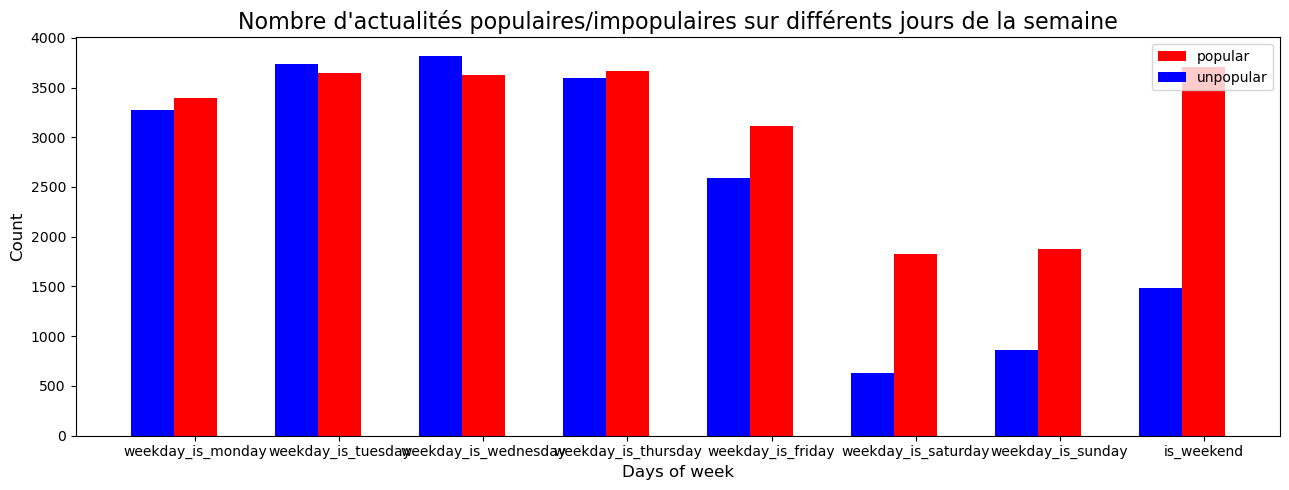

In [26]:
# Visualisation des articles populaires et non populaires selon les différents jours de la semaine et selon la variable weekend 
columns_day = df1.columns.values[29:37]
unpop=df[df['shares']<1400]
pop=df[df['shares']>=1400]
unpop_day = unpop[columns_day].sum().values
pop_day = pop[columns_day].sum().values

from IPython import get_ipython

get_ipython().run_line_magic('matplotlib', 'inline')

fig = plt.figure(figsize = (13,5))
plt.title("Nombre d'actualités populaires/impopulaires sur différents jours de la semaine", fontsize = 16)
plt.bar(np.arange(len(columns_day)), pop_day, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(columns_day)) - 0.3, unpop_day, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(columns_day)), columns_day)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.savefig("days.pdf")
plt.show()  

*Commentaire: On peut observer que du lundi au vendredi les articles populaires et impopulaires ont des proportions similaires, avec une légère domination des articles populaires (pour le vendredi surtout). Par contre le samedi et le dimanche les articles populaires dominent sur les articles impopolaires et cela est déterminé également le jour du weekend (par la variable 'is_weekend').

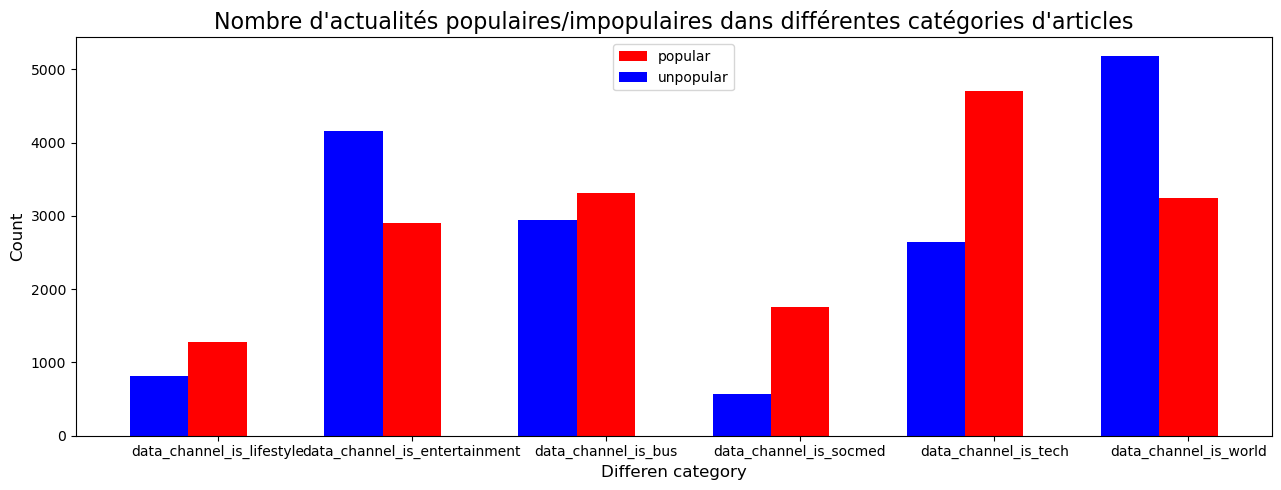

In [27]:
# Visualize the feature of different article category
columns_ch=df1.columns.values[11:17]
unpop_ch = unpop[columns_ch].sum().values
pop_ch = pop[columns_ch].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Nombre d'actualités populaires/impopulaires dans différentes catégories d'articles", fontsize = 16)
plt.bar(np.arange(len(columns_ch)), pop_ch, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(columns_ch)) - 0.3, unpop_ch, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(columns_ch)), columns_ch)

plt.ylabel("Count", fontsize = 12)
plt.xlabel("Differen category", fontsize = 12)
    
plt.legend(loc = 'upper center')
plt.tight_layout()
plt.savefig("chan.pdf")
plt.show()  


*Commentaire: On peut observer que les articles populaires dont le canal des données est <<"Tech">> surpassent les articles populaires dont les canaux 
des données sont autres que <<"Tech">> et que les articles impopulaires dont le canal des données est <<"World">> surpassent les articles impopulaires
dont les canaux des données est autre que <<"World">>.

### III-2) Normalisation min-max des variables explicatives numériques

On va effectuer une normalisation min-max uniquement sur les variables numériques explicatives pour attenuer l' impact des valeurs extrêmes (outliers) car certains modèles sont sensibles aux valeurs extrêmes.

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Initialiser le normaliseur Min-Max
scaler = MinMaxScaler()

# Sélectionner toutes les colonnes numériques (de type float ou int64) de df1, sauf les colonnes binaires
numerical_columns = df1.select_dtypes(include=['float', 'int64']).columns

# Normaliser les colonnes sélectionnées
df1[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Afficher les premières lignes pour vérifier
display(df1.head(n=1))

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.47619,0.025844,0.000947,0.00096,0.001254,0.013158,0.017241,0.007812,0.0,0.582024,...,0.378636,0.1,0.7,0.65,0.4,0.8,0.5,0.40625,0.0,0.1875


## IV) Prédiction
On s'intéresse maintenant au problème de prédiction par trois méthodes de classification différentes en éffectuant pour chaque méhode la prédiction sans aucune réduction des dimensions et avec réduction des dimensions par ACP et UMAP.
Nous avons décidé de choisir les méthodes suivantes pour faire la prédiction:
* Random Forest: C'est une méthode résistante aux données atypiques ou aux outliers, car les arbres non corrélés s’adaptent de manière indépendante aux données et elle s'adapte également aux données complexes même s'il n'ya pas de rélation linéaire entre la cible et les variables explicatives. Elle demeure l'une des méthodes les plus utilisées en machine learning.
* SVM: C'est aussi l'une des méthodes les plus populaires en machien learning, les SVM (support Vector Machine) sont des séparateurs à vaste marge.
Les SVM peuvent aussi gérer des données complexes comme des relations non linéaires entre la cible et les variables explicatives en utilisant des noyaux (ou fonctions de kernel) qui permettent de transformer les données en un espace vectoriel de plus haute dimension, où la séparation linéaire devient possible. Les noyaux les plus couramment utilisés sont le noyau polynomial, le noyau radial et le noyau sigmoid. C'est une technique utilisée pour résoudre des problèmes de classification où les classes ne sont pas linéairement séparables, en utilisant des techniques telles que la régularisation avec des poids (weight decay) ou la méthode de vote one-vs-one pour les problèmes multiclasses.
* KNN: Le KNN ou algorithme des plus proches voisins est aussi l' une des méthodes les plus populaires en machine learning. Cette méthode est robuste aux données complexes car il est capable de gérer des relations non-linéaires, des interactions complexes entre variables, et des outliers, tout en offrant une flexibilité dans le choix de la métrique de distance.


#### Avantage et Inconvénient de ces méthodes.
* Random Forest: Robuste aux valeurs manquantes, capable de gerer des données volumineuses, évite le surajustement en utilisant des techniques de sous-échantillonnage et de sélection des variables. Cette méthode présente comme inconvénients: si le nombre d'arbres est trop faible, le modèle peut ne pas capter suffisamment la complexité des données donc risque de sous, et si le nombre des variables sélectionnées pour chaque division est trop élevé, chaque arbre de la forêt aléatoire deviendra plus similaire, ce qui peut augmenter le risque de surajustement car les arbres déviennent moins diversifiés.
* KNN: il est résistant aux données bruitées ou aux données avec des valeurs aberrantes, car il se concentre sur les voisins les plus proches et ignore les données plus éloignées. Il peut être utilisé en classification et en régression, ainsi que pour les problèmes de clustering et d’anomalie detection. Mais cette méthode est par contre sensible aux dimensions des données, ce qui signifie que les performances de l’algorithme peuvent varier en fonction du nombre de variables explicatives. en plus si k est trop petit, l’algorithme peut être trop sensible aux données bruitées, tandis que si k est trop grand, l’algorithme peut perdre sa précision.
* SVM: c'est une technique qui utilise des fonctions de noyau pour transformer les données en espaces de dimensions supérieures, ce qui permet de séparer les classes non linéairement séparables dans l’espace original. Les SVM sont résistants aux données bruitées en raison de la maximisation de la marge entre les classes. Par contre les SVM ne fournissent pas naturellement des estimations de probabilité, ce qui peut limiter leur utilisation dans certaines applications. Ils sont également sensible aux choix des hyperparamètres et du noyau approprié.

### IV-1) Prediction sans Réduction de dimensions

### Forêt aléatoire

In [29]:
# Décomposer les données en apprentissage et test.
from sklearn.model_selection import train_test_split
# X est la nouvelle dataframe contenant les explicatives et y est la cible
X, y = df1, popular_label
# Diviser la nouvelle base de données en train et test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Taille des données d'entrainement", X_train.shape[0])
print("Taille des données de test", X_test.shape[0])
print()

Taille des données d'entrainement 31715
Taille des données de test 7929



In [30]:
# Importer les librairies 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from math import ceil

rfc=RandomForestClassifier(n_estimators=500, max_features=ceil(X.shape[1] ** 0.5)
                           ,random_state=42, oob_score=True)

lr=LogisticRegression(solver='liblinear')

#ceil(X.shape[1] ** 0.5

In [31]:
# Stocker les modèles de forêt aléatoire et de refression logistique dans une fonction classifier
classifier={
    'RandomForestClassifier': rfc,
    'LogisticRegression': lr,
}
    

In [32]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score
def train_classifier(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    y_pred=classifier.predict(X_test)
    accuracy= accuracy_score (y_test, y_pred)
    precision=precision_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)
    auc=roc_auc_score(y_test, y_pred)
    return accuracy, precision, f1, auc
                      

In [33]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score
accuracies = []
precisions = []
f1_scores = []
auc_scores = []
for name, clsr in classifier.items():
    current_accuracy, current_precision, current_f1_score, current_auc_score=train_classifier(clsr, X_train, X_test, y_train, y_test)
      # Affichage des résultats pour chaque modèle
    print("Model -", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)
    print("F1-score -", current_f1_score)
    print("AUC -", current_auc_score)
    print("\n")
    
    # Ajouter les scores aux listes correspondantes
    accuracies.append(current_accuracy)
    precisions.append(current_precision)
    f1_scores.append(current_f1_score)
    auc_scores.append(current_auc_score)





Model - RandomForestClassifier
Accuracy - 0.6699457686971876
Precision - 0.668418747262374
F1-score - 0.6999197339754615
AUC - 0.6666854155068211


Model - LogisticRegression
Accuracy - 0.6437129524530205
Precision - 0.6481729055258467
F1-score - 0.6731458984149022
AUC - 0.6408656798654675




### SVM                   

In [34]:
# Le meilleur paramètre gamma correspondant sur [0.001, 0.01, 0.1, 1.0, 10, 100] est 0.001 et le meilleur Kernel correspondant 
# aux meilleures performances est le linear
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
# Creér le modèle SVM
svc=SVC(kernel= 'linear', gamma=0.001)
svc.fit(X_train, y_train)

SVC(gamma=0.001, kernel='linear')

In [35]:
#Prédiction sur le test
y_pred=svc.predict(X_test)
#Matrice de confusion
confusion_matrix(y_test, y_pred)

array([[2033, 1741],
       [1159, 2996]], dtype=int64)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.54      0.58      3774
           1       0.63      0.72      0.67      4155

    accuracy                           0.63      7929
   macro avg       0.63      0.63      0.63      7929
weighted avg       0.63      0.63      0.63      7929



### KNN

In [37]:
X_train1 = np.array(X_train)
X_test1 = np.array(X_test)
y_train1 = np.array(y_train)
y_test1 = np.array(y_test)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
# Créer le modèle knn
knn=KNeighborsClassifier(n_neighbors=83)
knn.fit(X_train1, y_train1)

KNeighborsClassifier(n_neighbors=83)

In [39]:
#le taux de précision
score=knn.score(X_test1, y_test1)
print('Score: %f' % score)

Score: 0.636776


In [40]:
# Tester k de 1 à 84
neighbors=np.arange(1,84)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train1, y_train1)
    train_accuracy[i]=knn.score(X_train1, y_train1)
    test_accuracy[i]=knn.score(X_test1, y_test1)

print(test_accuracy)

[0.57447345 0.56413167 0.59326523 0.58922941 0.59906672 0.59994955
 0.60802119 0.60675999 0.61306596 0.61155253 0.61344432 0.6159667
 0.61647118 0.61773237 0.62138983 0.62227267 0.62567789 0.62656073
 0.62693908 0.62744356 0.62668685 0.6270652  0.62504729 0.62466894
 0.62479506 0.62593013 0.63034431 0.63072266 0.6322361  0.63274057
 0.62983983 0.62908311 0.63135326 0.63147938 0.63135326 0.6309749
 0.62845252 0.63047043 0.63059654 0.63122714 0.63210998 0.63135326
 0.63311893 0.62870475 0.62996595 0.62996595 0.63261445 0.6316055
 0.6316055  0.63173162 0.63147938 0.6322361  0.63299281 0.63274057
 0.63324505 0.6322361  0.63438012 0.63501072 0.63627191 0.6355152
 0.63614579 0.63374953 0.634254   0.63526296 0.63526296 0.63450624
 0.634254   0.63526296 0.63475848 0.63463236 0.63513684 0.63450624
 0.63513684 0.63299281 0.63601967 0.63362341 0.63412788 0.63475848
 0.63337117 0.63210998 0.63438012 0.63526296 0.63677639]


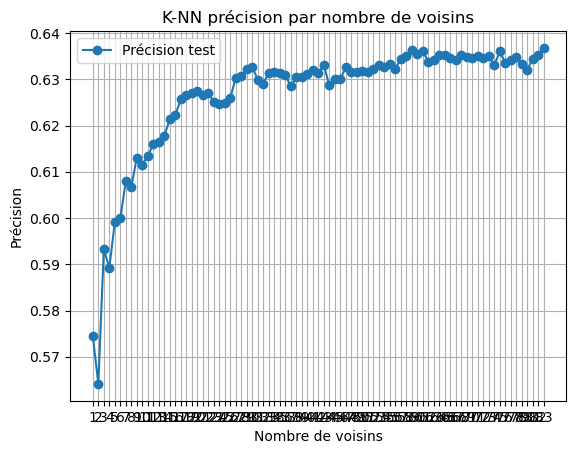

In [41]:
# Visualisation de taux de precision test
plt.plot(np.arange(1, 84), test_accuracy, 'o-', label='Précision test')  # Associer à 1-84
plt.title('K-NN précision par nombre de voisins')
plt.xlabel('Nombre de voisins')
plt.ylabel('Précision')
plt.xticks(np.arange(1, 84))  # Ajuste les valeurs sur l'axe x
plt.legend()
plt.grid()
plt.show()
# Le meilleur k correspond à la meilleure précision donc 0.636776

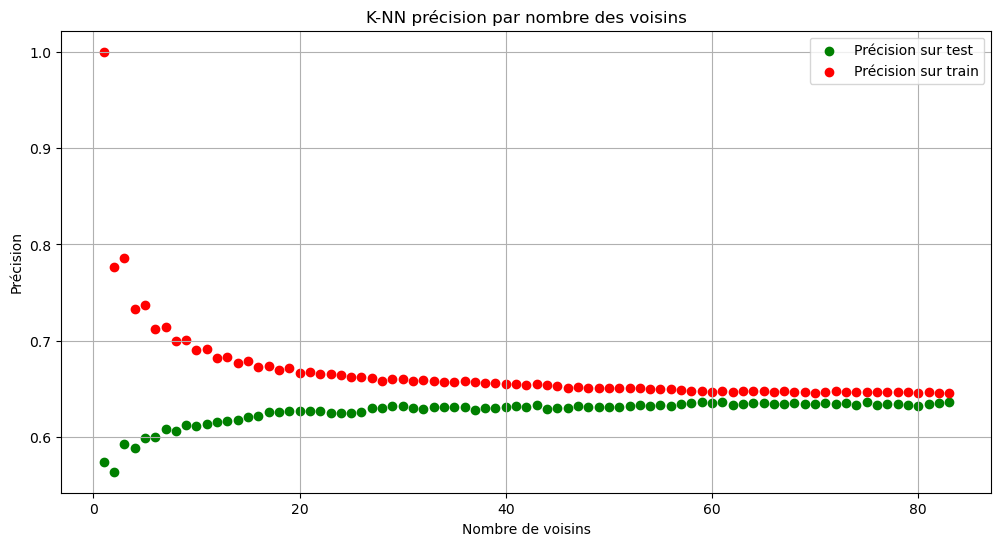

In [42]:
# Visualisation d'apprentissage et de test
plt.figure(figsize=(12, 6))  # Correction : 'fig_size' -> 'figsize'
plt.title('K-NN précision par nombre des voisins')
plt.scatter(neighbors, test_accuracy, label='Précision sur test', color="green")
plt.scatter(neighbors, train_accuracy, label='Précision sur train', color="red")
plt.legend()
plt.xlabel('Nombre de voisins')  # Correction : Apostrophe fermante et méthode correcte
plt.ylabel('Précision')  # Correction : Methode correcte
plt.grid()
plt.show()

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
# Créer le modèle knn
knn=KNeighborsClassifier(n_neighbors=83)
knn.fit(X_train1, y_train1)

KNeighborsClassifier(n_neighbors=83)

In [44]:
#Prédiction sur le test
y_pred=knn.predict(X_test1)
#Matrice de confusion
confusion_matrix(y_test1, y_pred)

array([[2272, 1502],
       [1378, 2777]], dtype=int64)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61      3774
           1       0.65      0.67      0.66      4155

    accuracy                           0.64      7929
   macro avg       0.64      0.64      0.64      7929
weighted avg       0.64      0.64      0.64      7929



### IV-2) Prediction avec Reduction de dimensions (ACP + UMAP) 
#### Utilité d'une réduction de dimension.
La réduction de dimension permet de simplifier les modèles et d'améliorer leur interprétabilité. Pour un jeu des données volumineux avec beaucoup de variables et d' observations, en appliquant une reduction de dimension cela va améliorer les performances et la robustesse du modèle.
*Pour réduction par ACP par exemple, l'idée est d'accorder la même importance à toutes les variables en normalisant les variables (surtout si elles n'ont pas la même unité de mésure ou que certaines variables prennent des valeurs plus élévées que d'autres) tout en cherchant à conserver le maximum de variance expliquée par les données.
*Pour la réduction de dimension avec UMAP, cela permet de conserver les structures locales et globales des données, ce qui signifie qu’il peut capturer les relations entre les observations de manière plus précise.UMAP est une méthode non-linéaire qui peut capturer les relations complexes entre les variables.

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)  # Choisir 15 composantes principales
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

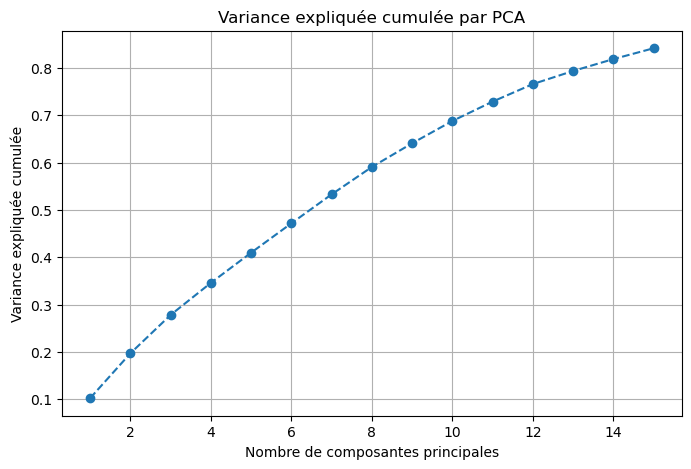

In [47]:
# 5.1 Visualisation de la variance expliquée par PCA
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.title('Variance expliquée cumulée par PCA')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.grid()
plt.show()

In [48]:
from umap import UMAP
# 6. Réduction de dimension avec UMAP
umap = UMAP(n_components=15, random_state=42)  # Choisir 15 dimensions
X_train_umap = umap.fit_transform(X_train)
X_test_umap = umap.transform(X_test)

C:\Users\ousma\anaconda3\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\ousma\anaconda3\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\ousma\anaconda3\Lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keywo

In [49]:
# 7. Initialisation des modèles
models = {
    'RandomForest': RandomForestClassifier(n_estimators=500, max_features=ceil(X.shape[1] ** 0.5), random_state=42, oob_score=True),
    'SVM': SVC(kernel='sigmoid', gamma=0.001),
    'KNN': KNeighborsClassifier(n_neighbors=83)
}


In [50]:
# 8. Fonction pour entraîner et évaluer un modèle
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
    print(classification_report(y_test, y_pred))
    return accuracy, precision, f1, auc

In [51]:
# 9. Entraîner et évaluer avec PCA
print("\n--- Modèles avec réduction PCA ---")
for name, model in models.items():
    print(f"\nModèle : {name}")
    acc, prec, f1, auc = train_and_evaluate(model, X_train_pca, X_test_pca, y_train, y_test)
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, F1-Score: {f1:.4f}, AUC: {auc:.4f}")



--- Modèles avec réduction PCA ---

Modèle : RandomForest
              precision    recall  f1-score   support

           0       0.61      0.56      0.58      3774
           1       0.63      0.68      0.65      4155

    accuracy                           0.62      7929
   macro avg       0.62      0.62      0.62      7929
weighted avg       0.62      0.62      0.62      7929

Accuracy: 0.6213, Precision: 0.6206, F1-Score: 0.6199, AUC: 0.6185

Modèle : SVM
              precision    recall  f1-score   support

           0       0.63      0.48      0.54      3774
           1       0.61      0.75      0.67      4155

    accuracy                           0.62      7929
   macro avg       0.62      0.61      0.61      7929
weighted avg       0.62      0.62      0.61      7929

Accuracy: 0.6175, Precision: 0.6197, F1-Score: 0.6100, AUC: 0.6110

Modèle : KNN
              precision    recall  f1-score   support

           0       0.62      0.58      0.60      3774
           1    

In [52]:
# 10. Entraîner et évaluer avec UMAP
print("\n--- Modèles avec réduction UMAP ---")
for name, model in models.items():
    print(f"\nModèle : {name}")
    acc, prec, f1, auc = train_and_evaluate(model, X_train_umap, X_test_umap, y_train, y_test)
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, F1-Score: {f1:.4f}, AUC: {auc:.4f}")


--- Modèles avec réduction UMAP ---

Modèle : RandomForest
              precision    recall  f1-score   support

           0       0.58      0.55      0.57      3774
           1       0.61      0.63      0.62      4155

    accuracy                           0.60      7929
   macro avg       0.59      0.59      0.59      7929
weighted avg       0.59      0.60      0.59      7929

Accuracy: 0.5952, Precision: 0.5945, F1-Score: 0.5946, AUC: 0.5932

Modèle : SVM
              precision    recall  f1-score   support

           0       0.48      0.46      0.47      3774
           1       0.53      0.55      0.54      4155

    accuracy                           0.50      7929
   macro avg       0.50      0.50      0.50      7929
weighted avg       0.50      0.50      0.50      7929

Accuracy: 0.5042, Precision: 0.5033, F1-Score: 0.5036, AUC: 0.5022

Modèle : KNN
              precision    recall  f1-score   support

           0       0.62      0.57      0.60      3774
           1   

### IV-3) Interprétation des résultats obtenus pour les prédiction sans Réduction et avec Réduction de dimensions
Sans réduction de dimension, RandomForest a fourni les meilleures performances globales en termes d'Accuracy, F1-score, et AUC, en particulier pour la classe 1.
RandomForest et SVM ont vu une baisse notable de leurs performances avec ACP.
KNN a maintenu des performances proches de celles obtenues sans réduction de dimension.
Cela suggère que la perte d’information causée par ACP a un effet plus marqué sur les modèles comme RandomForest et SVM, qui dépendent des caractéristiques d’entrée pour construire des séparateurs complexes.
KNN est le meilleur modèle parmi les trois après UMAP: il a conservé une performance stable, comparable à celle obtenue sans réduction. Ainsi, UMAP n'a pas impacté négativement sa capacité à prédire la classe 1 (la popularité des articles), qui est l'objectif principal.
Performance en fonction de la cible : Classe 1 (popularité) est mieux prédite que la classe 0 pour tous les modèles, ce qui est cohérent avec l'objectif du projet.
En conclusion, s'il faut choisir un modèle basé sur les 3 techniques de prédiction (sans réduction et avec réduction), KNN semble être le meilleur pour une meilleure robustesse et des performances stables. SVM a montré une performance médiocre avec UMAP, et RandomForest a subi une dégradation significative. Mais s'il faut juste choisir un modèle parmis les 9, Random Forest sans reduction de dimension semble être le meilleur.


### V) Sélection et influence des variables
Nous allons effectuer la séléction et binfluence des variables avec Regression Logistic

In [53]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import scipy.stats
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import Lasso, LassoLarsCV 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, r2_score

### Séléction avec Stabilité

In [54]:
# Étape 2 : Séparer les données explicatives et la cible
X = df.drop(columns=['shares'])  # Variables explicatives
y = popular_label  # Variable cible discrétisée
# Étape 1 : Discrétiser la variable cible en deux classes (pop et unpop)
median_threshold = 1400
popular_label = (df['shares'] >= median_threshold).astype(int)  # 1 pour pop, 0 pour unpop
# Étape 3 : Diviser en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [55]:
# Étape 2 : Régression Logistique avec sélection par stabilité (Bootstrap)
n_iterations = 1000  # Nombre d'itérations du bootstrap
selection_count = np.zeros(X_train.shape[1])  # Comptage des sélections des variables

# Bootstrap
for i in range(n_iterations):
    # Échantillonnage bootstrap
    X_bs, y_bs = resample(X_train, y_train, replace=True)

In [56]:
# Ajustement du modèle de régression logistique avec pénalité l1
logistic_model_bs = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, C=1.0, random_state=42)
logistic_model_bs.fit(X_bs, y_bs)
    

LogisticRegression(max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

In [57]:
# Compter les variables avec des coefficients non nuls
selection_count += (logistic_model_bs.coef_ != 0).astype(int)[0]
print(selection_count )

[1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]


In [58]:
# Étape 3 : Sélection des variables en fonction du seuil
stability_threshold = 1  # Exemple : au moins 70% des itérations
selected_features = selection_count >= 1
print(f"Nombre de variables sélectionnées : {np.sum(selected_features)}")


Nombre de variables sélectionnées : 54


In [59]:
# Réduire les jeux de données aux variables sélectionnées
X_train_stab = X_train.loc[:, selected_features]
X_test_stab = X_test.loc[:, selected_features]


In [60]:
# Étape 4 : Ajustement final avec Régression Logistique sur les variables sélectionnées
final_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, C=1.0, random_state=42)
final_model.fit(X_train_stab, y_train)

LogisticRegression(max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

In [61]:
# Prédictions finales
y_pred = final_model.predict(X_test_stab)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.61      0.62      3698
           1       0.67      0.70      0.69      4231

    accuracy                           0.66      7929
   macro avg       0.66      0.66      0.66      7929
weighted avg       0.66      0.66      0.66      7929



In [76]:
#Importance rélative des variables.
X_train_stab.columns[np.where(final_model.coef_!=0)[1]]

Index(['n_tokens_title', 'n_tokens_content', 'n_non_stop_words',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'average_token_length', 'num_keywords',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'rate_positive_words',
       'min_positive_polarity', 'max_positive_pol

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

MemoryError: Unable to allocate 23.5 GiB for an array with shape (3160025801,) and data type float64

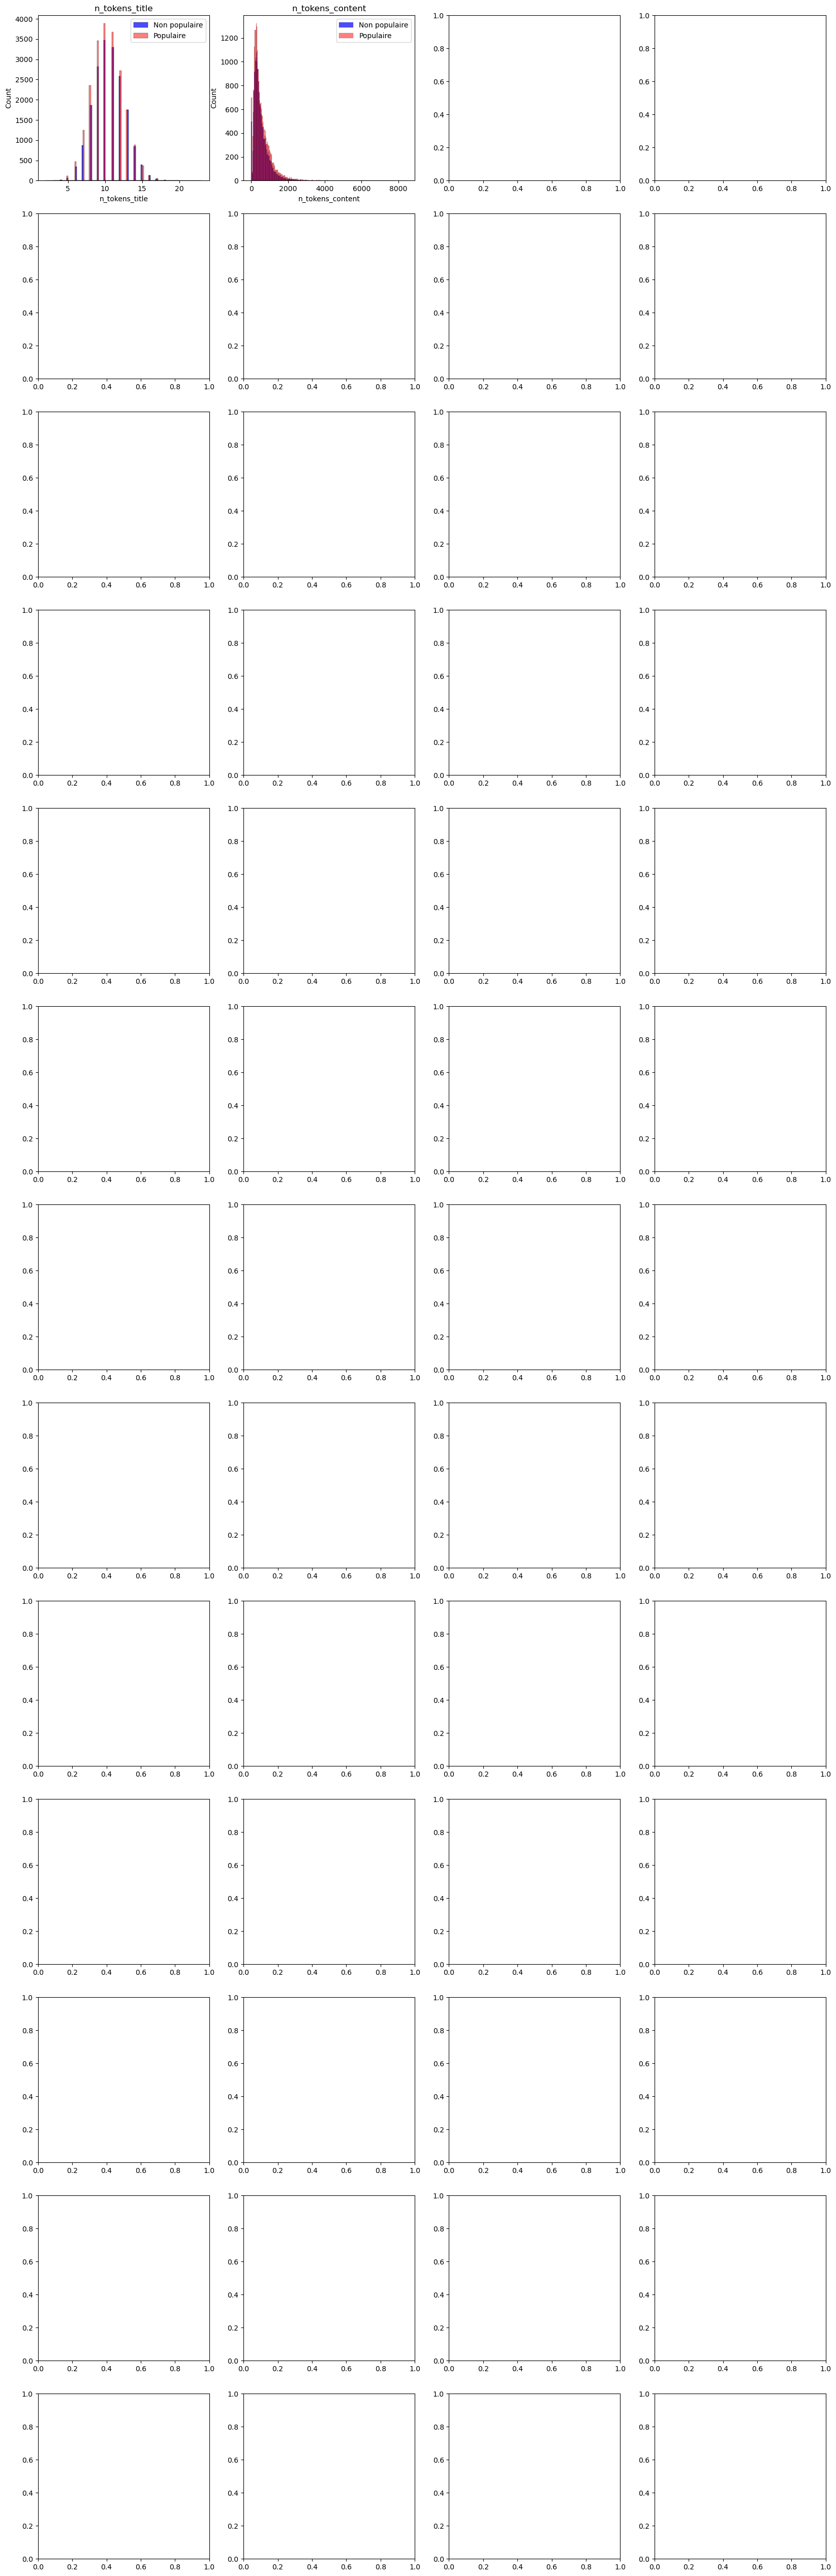

In [79]:
# Étape 1 : Créer la colonne popular_label
median_threshold = 1400
popular_label = (df['shares'] >= median_threshold).astype(int)
df['popular_label'] = popular_label

# Vérifier la présence de la colonne
print(df.columns)

# Étape 2 : Tracer les histogrammes
features = [
    'n_tokens_title', 'n_tokens_content', 'n_non_stop_words',
    'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
    'num_videos', 'average_token_length', 'num_keywords',
    'data_channel_is_lifestyle', 'data_channel_is_entertainment',
    'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
    'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
    'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
    'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
    'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
    'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
    'weekday_is_saturday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
    'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
    'global_rate_positive_words', 'rate_positive_words',
    'min_positive_polarity', 'max_positive_polarity',
    'avg_negative_polarity', 'min_negative_polarity', 'title_subjectivity',
    'title_sentiment_polarity', 'abs_title_subjectivity',
    'abs_title_sentiment_polarity'
]



n_cols = 4
n_rows = (len(features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

for i, feat in enumerate(features):
    ax = axes[i]
    sns.histplot(data=df[df['popular_label'] == 0], x=feat, color='blue', label='Non populaire', kde=False, stat='count', ax=ax, alpha=0.7)
    sns.histplot(data=df[df['popular_label'] == 1], x=feat, color='red', label='Populaire', kde=False, stat='count', ax=ax, alpha=0.5)
    ax.set_title(feat)
    ax.legend()

# Masquer les axes inutilisés si le nombre de features n'est pas un multiple de n_cols
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [82]:
from scipy.stats import spearmanr

X_train_numpy = X_train.values
y_train_numpy = y_train.values

corlist = np.zeros(X_train.shape[1])

for i in range(X_train.shape[1]):
    unique_values = np.unique(X_train_numpy[:, i])
    if len(unique_values) == 1:  # Colonne constante
        corlist[i] = np.nan  
    else:
        # Utilisation de spearmanr
        corlist[i] = abs(spearmanr(y_train_numpy, X_train_numpy[:, i])[0])

# Création d'un DataFrame pour associer les noms de variables à leurs corrélations
df_cor = pd.DataFrame({'features': features, 'spearman_abs_corr': corlist})

# Tri par corrélation décroissante
df_cor_sorted = df_cor.sort_values(by='spearman_abs_corr', ascending=False)

# Afficher les 54 variables les plus corrélées
top_54 = df_cor_sorted.head(54)
print(top_54)

ValueError: All arrays must be of the same length

In [84]:
#print(len(features))
print(X_train.shape[1])

58


### Sélection avec corrélation avec la variables cible

In [63]:
X_train_numpy = X_train.values  # Conversion si X_train est un DataFrame Pandas
y_train_numpy = y_train.values  # Conversion si y_train est un DataFrame ou une série Pandas

corlist = np.zeros(X_train.shape[1])

for i in range(X_train.shape[1]):
    unique_values = np.unique(X_train_numpy[:, i])
    if len(unique_values) == 1:  # Colonne constante
        corlist[i] = np.nan  # Ignorer cette colonne
    else:
        corlist[i] = abs(scipy.stats.spearmanr(y_train_numpy, X_train_numpy[:, i]).correlation)

# Étape 6 : Afficher les corrélations
print(f"Corrélations absolues de Spearman entre la cible et les variables explicatives :\n{corlist}")

Corrélations absolues de Spearman entre la cible et les variables explicatives :
[0.04696679 0.01512453 0.04593575 0.01416455 0.06461213 0.08399246
 0.03105208 0.0731816  0.02372415 0.04988416 0.07483741 0.0370452
 0.11294447 0.00681824 0.11032701 0.10441874 0.1549162  0.02624094
 0.08465678 0.09698927 0.03918706 0.05293117 0.01080359 0.08063404
 0.17911268 0.20656394 0.15098612 0.13552841 0.15608783 0.02192163
 0.03848092 0.0419474  0.02766288 0.0099685  0.10790778 0.08211654
 0.13873235 0.02745954 0.07880134 0.1421606  0.03580647 0.06306638
 0.09700099 0.08178686 0.07031291 0.02349192 0.06055935 0.07059378
 0.04404951 0.04546168 0.05468595 0.00319878 0.00370877 0.00203671
 0.03057618 0.05386947 0.00039758 0.02832881]


In [64]:
cor_thr=0.1

tokeep = []
for i in range(X_train.shape[1]):
    if corlist[i]>cor_thr:
        tokeep.append(X_train.columns[i])


In [65]:
tokeep[0:3]

['data_channel_is_entertainment',
 'data_channel_is_socmed',
 'data_channel_is_tech']

In [66]:
len(tokeep)

12

In [67]:
X_train_mod = X_train[tokeep]
X_test_mod = X_test[tokeep]

In [68]:
from sklearn.linear_model import LogisticRegressionCV

y_train_binary = y_train

EN_model = LogisticRegressionCV(cv=5, penalty="l1",solver='liblinear',max_iter=100)
EN_model.fit(X_train_mod,y_train_binary)

LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear')

In [69]:
EN_model.C_

array([2.7825594])

In [70]:
(EN_model.coef_==0).sum()

0

In [71]:
from sklearn.metrics import classification_report
y_test_binary = y_test
y_pred_binary = EN_model.predict(X_test_mod)
print(classification_report(y_test_binary, y_pred_binary))

              precision    recall  f1-score   support

           0       0.63      0.58      0.60      3698
           1       0.66      0.71      0.68      4231

    accuracy                           0.65      7929
   macro avg       0.64      0.64      0.64      7929
weighted avg       0.64      0.65      0.64      7929



La prédiction par stabilité donne une meilleure performance en terme d'exactitude (66%), de precision et de F1-Score mais elle  utilise 56 variables. Par contre la séléction par corrélation donne une performance légérement inférieure(65%) de précision, mais elle utilise seulement 12 variables. 
En conclusion, la méthode par stabilité offre une meilleure performance que celle par corrélation mais en terme de complexité elle est un peu complexe que la méthode par corrélation. Malgrès cette complexité (vue que le coût compitationnel n'est pas élévé), on peut préférer la méthode par stabilité.

## VI) Conclusion:
Dans ce projet, nous avons exploré et mis en œuvre plusieurs techniques d'analyse de données et de modélisation pour comprendre et prédire la popularité d'articles à partir d'un ensemble complexe de données. Nous avons d'abord utiliséRandomFOrest, SVM et KNN  pour effectuer une prédiction en classification.Nous avons également effectué une analyse de corrélation avec la méthode de Spearman pour mesurer la relation entre les variables explicatives et la variable cible en excluant les variables constantes. Cette approche nous a permis de mieux comprendre les interactions entre les différentes variables et de renforcer la performance du modèle en réduisant le bruit et en mettant l'accent sur les variables les plus pertinentes.
Ce projet montre l'importance de la sélection des variables, de la gestion des données manquantes ou redondantes, et de l'évaluation rigoureuse des performances pour développer des modèles prédictifs robustes. En conclusion, la combinaison d'une bonne gestion des données et de techniques d'apprentissage automatique permet d'améliorer considérablement la capacité du modèle à faire des prédictions fiables.
